# Imports

In [1]:
using DataFrames
using CSV
using MLJ
using Plots
using StatsBase

include("../../lib.jl")

ENV["LINES"]=30;

# Datasets

In [2]:
data = CSV.read("./data.csv")

,1,2,3,4,5,6,7,8,9,10,11
,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Float64,Int64,Int64,Int64
1,3.919,2.6909,0,0,0,0,0,31.4,2,0,0
2,4.17,2.1144,0,0,0,0,0,30.8,1,1,0
3,3.932,3.2512,0,0,0,0,0,26.7,2,4,0
4,3.0,2.7098,0,0,0,0,0,20.0,0,2,0
5,4.236,3.3944,0,0,0,0,0,29.4,2,4,0
6,4.236,3.4286,0,0,0,0,0,28.6,2,4,0
7,5.0,5.0476,1,0,0,0,0,11.1,0,3,0
8,4.525,3.8301,0,0,0,0,0,31.6,3,2,0
9,4.596,3.0777,0,0,0,0,2,44.4,2,0,0


In [3]:
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,1,4.78264,2.0,4.828,6.496,,,Float64
2,2,3.06951,0.8039,3.0463,9.1775,,,Float64
3,3,0.716588,0,0.0,12,,,Int64
4,4,0.042654,0,0.0,3,,,Int64
5,5,0.980095,0,0.0,36,,,Int64
6,6,0.290047,0,0.0,13,,,Int64
7,7,1.64645,0,1.0,18,,,Int64
8,8,37.0556,0.0,37.5,60.7,,,Float64
9,9,1.3763,0,1.0,24,,,Int64


Look at class labels to see if dataset is imbalanced

In [4]:
label_counts = countmap(data[:Class])

Dict{String,Int64} with 2 entries:
  "RB"  => 356
  "NRB" => 699

In [5]:
collect(label_counts[i] / size(data)[1] for i in keys(label_counts))

2-element Array{Float64,1}:
 0.33744075829383885
 0.6625592417061611

Get data ready for training

In [6]:
coerce!(data, :Class=>Multiclass)
schema(data)

┌─────────┬─────────────────────────────────┬───────────────┐
│ _.names │ _.types                         │ _.scitypes    │
├─────────┼─────────────────────────────────┼───────────────┤
│ 1       │ Float64                         │ Continuous    │
│ 2       │ Float64                         │ Continuous    │
│ 3       │ Int64                           │ Count         │
│ 4       │ Int64                           │ Count         │
│ 5       │ Int64                           │ Count         │
│ 6       │ Int64                           │ Count         │
│ 7       │ Int64                           │ Count         │
│ 8       │ Float64                         │ Continuous    │
│ 9       │ Int64                           │ Count         │
│ 10      │ Int64                           │ Count         │
│ 11      │ Int64                           │ Count         │
│ 12      │ Float64                         │ Continuous    │
│ 13      │ Float64                         │ Continuous    │
│ 14    

In [7]:
y, X = unpack(data, ==(:Class), colname->true)

(CategoricalValue{String,UInt32}["RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB", "RB"  …  "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB", "NRB"], 1055×41 DataFrame. Omitted printing of 33 columns
│ Row  │ 1       │ 2       │ 3     │ 4     │ 5     │ 6     │ 7     │ 8       │
│      │ Float64 │ Float64 │ Int64 │ Int64 │ Int64 │ Int64 │ Int64 │ Float64 │
├──────┼─────────┼─────────┼───────┼───────┼───────┼───────┼───────┼─────────┤
│ 1    │ 3.919   │ 2.6909  │ 0     │ 0     │ 0     │ 0     │ 0     │ 31.4    │
│ 2    │ 4.17    │ 2.1144  │ 0     │ 0     │ 0     │ 0     │ 0     │ 30.8    │
│ 3    │ 3.932   │ 3.2512  │ 0     │ 0     │ 0     │ 0     │ 0     │ 26.7    │
│ 4    │ 3.0     │ 2.7098  │ 0     │ 0     │ 0     │ 0     │ 0     │ 20.0    │
│ 5    │ 4.236   │ 3.3944  │ 0     │ 0     │ 0     │ 0     │ 0     │ 29.4    │
│ 6    │ 4.236   │ 3.4286  │ 0     │ 0     │ 0     │ 0     │ 0     │ 28.6    │
│ 7    │ 5.0     │ 5.0476  │ 1     │ 0     │ 0     │ 0     │ 0     │ 11.

Partition train and test data accoring to class labels

In [8]:
# data to use when trying to fit a single validation set
train, test = partition(eachindex(y), 0.7, shuffle=true, rng=145) # gives 70:30 split

([531, 637, 400, 786, 676, 791, 963, 561, 277, 584  …  486, 403, 1052, 784, 872, 147, 925, 930, 445, 974], [286, 263, 741, 694, 950, 552, 681, 701, 645, 91  …  975, 1049, 992, 957, 891, 705, 130, 471, 906, 809])

In [9]:
train_counts = countmap(data[train,:Class])
collect(train_counts[i] / size(train)[1] for i in keys(train_counts))

2-element Array{Float64,1}:
 0.34688346883468835
 0.6531165311653117

In [10]:
test_counts = countmap(data[test,:Class])
collect(test_counts[i] / size(test)[1] for i in keys(test_counts))

2-element Array{Float64,1}:
 0.31545741324921134
 0.6845425867507886

In [11]:
standardizer = Standardizer()
stand = machine(standardizer, X[train,:]) #only want to standardize on training distribution
fit!(stand)
X_stand = MLJ.transform(stand, X);

┌ Info: Training Machine{Standardizer} @699.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


# Five Learning Algorithms

* Decision trees with some form of pruning
* Neural networks
* Boosting
* Support Vector Machines
* k-nearest neighbors


##### Testing
* Implement the algorithms
* Design two *interesting* classification problems. For the purposes of this assignment, a classification problem is just a set of training examples and a set of test examples.

In [12]:
models(matching(X,y))

6-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = ConstantClassifier, package_name = MLJModels, ... )
 (name = DecisionTreeClassifier, package_name = DecisionTree, ... )
 (name = DeterministicConstantClassifier, package_name = MLJModels, ... )
 (name = RandomForestClassifier, package_name = DecisionTree, ... )
 (name = RandomForestClassifier, package_name = ScikitLearn, ... )

In [13]:
@load SVMClassifier

SVMClassifier(
    C = 1.0,
    kernel = "rbf",
    degree = 3,
    gamma = "auto",
    coef0 = 0.0,
    shrinking = true,
    tol = 0.001,
    cache_size = 200,
    max_iter = -1,
    decision_function_shape = "ovr",
    random_state = nothing) @828

### Support Vector Machines
* This should be done in such a way that you can swap out kernel functions. I'd like to see at least two.

In [14]:
svm_model = SVMClassifier(kernel="linear")
svm_mach = machine(svm_model, X_stand, y)
fit!(svm_mach, rows=train, verbosity=2)
svm_acc = evaluate!(svm_mach, resampling=CV(shuffle=true), measure=[accuracy], 
                        verbosity=1)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @745`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Info: Training Machine{SVMClassifier} @336.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Evaluating over 6 folds: 100%[=========================] Time: 0:00:01


┌───────────┬───────────────┬───────────────────────────────────────────┐
│ _.measure │ _.measurement │ _.per_fold                                │
├───────────┼───────────────┼───────────────────────────────────────────┤
│ accuracy  │ 0.877         │ [0.858, 0.875, 0.892, 0.875, 0.881, 0.88] │
└───────────┴───────────────┴───────────────────────────────────────────┘
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [15]:
svm_model = SVMClassifier(kernel="sigmoid")
svm_mach = machine(svm_model, X_stand, y)
fit!(svm_mach, rows=train, verbosity=2)
svm_acc = evaluate!(svm_mach, resampling=CV(shuffle=true), measure=[accuracy], 
                        verbosity=1)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @632`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Info: Training Machine{SVMClassifier} @125.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────┬───────────────┬────────────────────────────────────────────┐
│ _.measure │ _.measurement │ _.per_fold                                 │
├───────────┼───────────────┼────────────────────────────────────────────┤
│ accuracy  │ 0.637         │ [0.602, 0.568, 0.636, 0.602, 0.642, 0.771] │
└───────────┴───────────────┴────────────────────────────────────────────┘
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [16]:
svm_model = SVMClassifier(kernel="rbf")
svm_mach = machine(svm_model, X_stand, y)
fit!(svm_mach, rows=train, verbosity=2)
svm_acc = evaluate!(svm_mach, resampling=CV(shuffle=true), measure=[accuracy], 
                        verbosity=1)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @087`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Info: Training Machine{SVMClassifier} @723.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────┬───────────────┬────────────────────────────────────────────┐
│ _.measure │ _.measurement │ _.per_fold                                 │
├───────────┼───────────────┼────────────────────────────────────────────┤
│ accuracy  │ 0.873         │ [0.864, 0.875, 0.898, 0.892, 0.841, 0.869] │
└───────────┴───────────────┴────────────────────────────────────────────┘
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


Poly Degree 2 took a long wall clock time

In [17]:
svm_model = SVMClassifier(kernel="poly", degree=2)
svm_mach = machine(svm_model, X_stand, y)
fit!(svm_mach, rows=train, verbosity=2)
svm_acc = evaluate!(svm_mach, resampling=CV(shuffle=true), measure=[accuracy], 
                        verbosity=1)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @741`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Info: Training Machine{SVMClassifier} @349.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────┬───────────────┬────────────────────────────────────────────┐
│ _.measure │ _.measurement │ _.per_fold                                 │
├───────────┼───────────────┼────────────────────────────────────────────┤
│ accuracy  │ 0.868         │ [0.847, 0.864, 0.869, 0.864, 0.892, 0.874] │
└───────────┴───────────────┴────────────────────────────────────────────┘
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


Can't use crossentropy because it is a probabilistic concept, and SVM doesn't do probabilities?

### GridSearch / RandomSearch

Use `linear` and `rbf`: 
* `linear` which has high bias
* `rbf` which has high variance

##### First look at `linear`

In [18]:
svm_linear_model = SVMClassifier(kernel="linear", cache_size=1000)
svm_linear_mach = machine(svm_linear_model, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @296`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{SVMClassifier} @139 trained 0 times.
  args: 
    1:	Source @155 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @584 ⏎ `AbstractArray{Multiclass{2},1}`


In [19]:
r1 = range(svm_linear_model, :C, lower=5*10^-2, upper=5*10^2, scale=:log10)
curve = learning_curve(svm_linear_mach, 
                        range=r1,
                        resampling=CV(), 
                        measure=accuracy, 
                        acceleration=CPUProcesses(),
                        resolution=30)

┌ Info: Training Machine{DeterministicTunedModel{Grid,…}} @525.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 30 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{CV,…} @917`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 30 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @527`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where 

Evaluating over 30 metamodels:  53%[=============>           ]  ETA: 0:00:05┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @650`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 30 metamodels:  57%[==============>          ]  ETA: 0:00:05┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @997`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 30 metamodels:  60%[===============>         ]  ETA: 0:00:06┌ Warning: T

(parameter_name = "C",
 parameter_scale = :log10,
 parameter_values = [0.05000000000000002, 0.06869118979416318, 0.09436959110675487, 0.1296471898702334, 0.1781123945131222, 0.24469504592387473, 0.3361678768249669, 0.4618354285936932, 0.6344805015839612, 0.8716644110999942  …  28.68076255224339, 39.402314078349555, 54.13183669370272, 74.36760536467558, 102.16798589284707, 140.3608101970589, 192.83102105817358, 264.91584531418533, 363.94769219915764, 499.99999999999994],
 measurements = [0.8304112554112555, 0.8294588744588745, 0.8332521645021645, 0.8389339826839827, 0.8427272727272728, 0.8455681818181818, 0.83987012987013, 0.8417748917748918, 0.84366341991342, 0.8417586580086579  …  0.839853896103896, 0.8408008658008658, 0.839853896103896, 0.8389069264069263, 0.8389069264069263, 0.839853896103896, 0.8389069264069263, 0.8389069264069263, 0.8389069264069263, 0.839853896103896],)

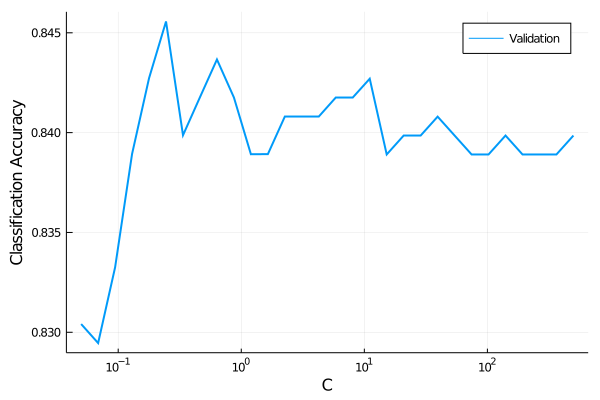

In [20]:
plot(curve.parameter_values,
     curve.measurements,
     xscale=curve.parameter_scale,
     xlab=curve.parameter_name,
     ylab="Classification Accuracy",
     label="Validation", lw=2)

In [21]:
a = round(maximum(curve.measurements), digits=5)

0.84557

In [22]:
best_C = curve.parameter_values[argmax(curve.measurements)]

0.24469504592387473

##### Second look at `rbf`

In [23]:
r1 = range(Float64, :C, lower=5*10^1, upper=5*10^6, scale=:log10)
r2 = range(Float64, :gamma, lower=10^-7, upper=10^-2, scale=:log10)

MLJBase.NumericRange(Float64, :gamma, ... )

In [24]:
svm_rbf_model = SVMClassifier(kernel="rbf", cache_size=1000)
self_tuning_svm_model = TunedModel(model=svm_rbf_model,
                                    tuning=Grid(goal=100),
                                    resampling=CV(), 
                                    measure=accuracy,
                                    acceleration=CPUThreads(),
                                    range=[r1,r2])

DeterministicTunedModel(
    model = SVMClassifier(
            C = 1.0,
            kernel = "rbf",
            degree = 3,
            gamma = "auto",
            coef0 = 0.0,
            shrinking = true,
            tol = 0.001,
            cache_size = 1000,
            max_iter = -1,
            decision_function_shape = "ovr",
            random_state = nothing),
    tuning = Grid(
            goal = 100,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = CV(
            nfolds = 6,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = accuracy(),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{Float64,MLJBase.Bounded,Symbol}[NumericRange{Float64,…} @385, NumericRange{Float64,…} @996],
    train_best = true,
    repeats = 1,
    n = nothing,
    acceleration = CPUThreads{Int64}(1),
    acceleration_resampling = CPU1{Nothing}(nothing),
 

In [25]:
self_tuning_svm_mach = machine(self_tuning_svm_model, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=DeterministicTunedModel{Grid,…} @199`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{DeterministicTunedModel{Grid,…}} @312 trained 0 times.
  args: 
    1:	Source @904 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @330 ⏎ `AbstractArray{Multiclass{2},1}`


In [26]:
z = fit!(self_tuning_svm_mach, rows=train)

┌ Info: Training Machine{DeterministicTunedModel{Grid,…}} @312.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 100 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{CV,…} @263`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:   0%[>                        ]  ETA: N/A┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @810`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} wher

Evaluating over 100 metamodels:  16%[====>                    ]  ETA: 0:00:57┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @884`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  17%[====>                    ]  ETA: 0:00:54┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @323`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  18%[====>                    ]  ETA: 0:00:50┌ Warning

Evaluating over 100 metamodels:  33%[========>                ]  ETA: 0:00:36┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @687`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  34%[========>                ]  ETA: 0:00:37┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @234`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  35%[========>                ]  ETA: 0:00:36┌ Warning

Evaluating over 100 metamodels:  50%[============>            ]  ETA: 0:00:29┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @702`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  51%[============>            ]  ETA: 0:00:28┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @621`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  52%[=============>           ]  ETA: 0:00:33┌ Warning

Evaluating over 100 metamodels:  67%[================>        ]  ETA: 0:00:29┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @224`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  68%[=================>       ]  ETA: 0:00:27┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @364`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  69%[=================>       ]  ETA: 0:00:26┌ Warning

Evaluating over 100 metamodels:  84%[=====================>   ]  ETA: 0:00:14┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @376`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  85%[=====================>   ]  ETA: 0:00:13┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @988`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
Evaluating over 100 metamodels:  86%[=====================>   ]  ETA: 0:00:12┌ Warning

Machine{DeterministicTunedModel{Grid,…}} @312 trained 1 time.
  args: 
    1:	Source @904 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @330 ⏎ `AbstractArray{Multiclass{2},1}`


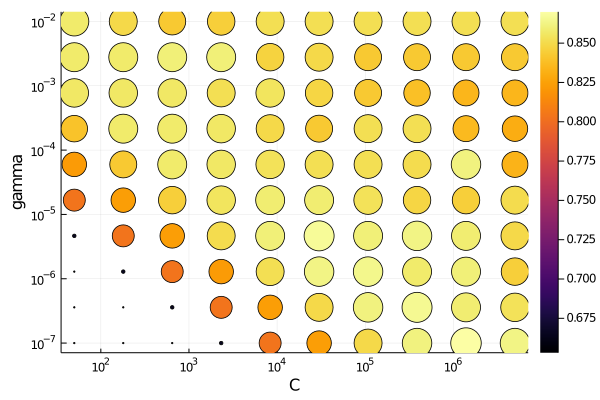

In [27]:
plot(self_tuning_svm_mach)

In [28]:
best_rbf = fitted_params(self_tuning_svm_mach)
best_rbf

(best_model = SVMClassifier @921,
 best_fitted_params = (support = Int32[9, 10, 17, 21, 38, 50, 56, 70, 76, 83  …  671, 673, 682, 683, 693, 698, 705, 718, 724, 733],
                       support_vectors = [-0.06293158750101487 -0.003529098543253602 … 0.0 0.0; 0.6128627841769588 1.4961156506680369 … 0.0 0.0; … ; -0.22183458840908007 0.6674026980392109 … 0.0 0.0; 0.006474320941586662 -0.24020083261279573 … 0.0 0.0],
                       n_support = Int32[126, 122],
                       dual_coef = [-1.3912797011035627e6 -1.3912797011035627e6 … 1.3912797011035627e6 1.3912797011035627e6],
                       coef = nothing,
                       intercept = [-150.49878928356304],
                       fit_status = 0,
                       classes = UInt32[0x00000001, 0x00000002],),)

In [29]:
best_rbf.best_model

SVMClassifier(
    C = 1.3912797011035627e6,
    kernel = "rbf",
    degree = 3,
    gamma = 1.0e-7,
    coef0 = 0.0,
    shrinking = true,
    tol = 0.001,
    cache_size = 1000,
    max_iter = -1,
    decision_function_shape = "ovr",
    random_state = nothing) @921

In [30]:
best_loss = round(z.report.best_result.measurement[1],digits=5)

0.86992

In [31]:
# fn = "Figures/LearningCurve_DT_merge_purity_thresh:$(best_mpt)_loss:$(best_loss)"
# png(replace(fn,'.' => ','))

##### More fitting

In [32]:
best_linear_model = SVMClassifier(kernel="linear", C = best_C)
svm_mach = machine(best_linear_model, X_stand, y)
lf = fit!(svm_mach, rows=train, verbosity=2)
svm_acc = evaluate!(svm_mach, resampling=CV(shuffle=true), measure=[accuracy], 
                        verbosity=1)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Info: Training Machine{SVMClassifier} @455.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────┬───────────────┬────────────────────────────────────────────┐
│ _.measure │ _.measurement │ _.per_fold                                 │
├───────────┼───────────────┼────────────────────────────────────────────┤
│ accuracy  │ 0.876         │ [0.847, 0.886, 0.864, 0.898, 0.909, 0.851] │
└───────────┴───────────────┴────────────────────────────────────────────┘
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [33]:
best_rbf_model = SVMClassifier(kernel="rbf", C=best_rbf.best_model.C, gamma=best_rbf.best_model.gamma)
svm_mach = machine(best_rbf_model, X_stand, y)
fit!(svm_mach, rows=train, verbosity=2)
svm_acc = evaluate!(svm_mach, resampling=CV(shuffle=true), measure=[accuracy], 
                        verbosity=1)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Info: Training Machine{SVMClassifier} @962.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────┬───────────────┬────────────────────────────────────────────┐
│ _.measure │ _.measurement │ _.per_fold                                 │
├───────────┼───────────────┼────────────────────────────────────────────┤
│ accuracy  │ 0.871         │ [0.875, 0.869, 0.903, 0.812, 0.858, 0.909] │
└───────────┴───────────────┴────────────────────────────────────────────┘
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


### Learning Curves

In [34]:
data_schedule, training_losses, valid_losses = learn_curve(best_linear_model, X_stand[train,:], y[train])

(d, train_metric, valid_metric) = (10, 1.0, 0.6959459459459459)
(d, train_metric, valid_metric) = (15, 1.0, 0.7432432432432432)
(d, train_metric, valid_metric) = (20, 1.0, 0.75)
(d, train_metric, valid_metric) = (25, 1.0, 0.7635135135135135)
(d, train_metric, valid_metric) = (30, 1.0, 0.7972972972972973)
(d, train_metric, valid_metric) = (35, 1.0, 0.7972972972972973)
(d, train_metric, valid_metric) = (40, 1.0, 0.7837837837837838)
(d, train_metric, valid_metric) = (45, 1.0, 0.7837837837837838)
(d, train_metric, valid_metric) = (50, 1.0, 0.7635135135135135)
(d, train_metric, valid_metric) = (55, 1.0, 0.75)
(d, train_metric, valid_metric) = (60, 0.9666666666666667, 0.7905405405405406)
(d, train_metric, valid_metric) = (65, 0.9846153846153847, 0.7972972972972973)
(d, train_metric, valid_metric) = (70, 0.9571428571428572, 0.8108108108108107)
(d, train_metric, valid_metric) = (75, 0.9333333333333333, 0.8175675675675675)
(d, train_metric, valid_metric) = (80, 0.9125, 0.8040540540540541)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (85, 0.9176470588235294, 0.8040540540540541)
(d, train_metric, valid_metric) = (90, 0.9333333333333333, 0.8243243243243243)
(d, train_metric, valid_metric) = (95, 0.8947368421052632, 0.8175675675675675)
(d, train_metric, valid_metric) = (100, 0.9, 0.7972972972972973)
(d, train_metric, valid_metric) = (105, 0.8952380952380953, 0.7905405405405406)
(d, train_metric, valid_metric) = (110, 0.8818181818181818, 0.7972972972972973)
(d, train_metric, valid_metric) = (115, 0.8956521739130435, 0.8243243243243243)
(d, train_metric, valid_metric) = (120, 0.9, 0.8445945945945946)
(d, train_metric, valid_metric) = (125, 0.896, 0.8310810810810811)
(d, train_metric, valid_metric) = (130, 0.8692307692307693, 0.7972972972972973)
(d, train_metric, valid_metric) = (135, 0.8666666666666667, 0.7972972972972973)
(d, train_metric, valid_metric) = (140, 0.8857142857142857, 0.7837837837837838)
(d, train_metric, valid_metric) = (145, 0.8896551724137931, 0.8040540540540541)
(d, tr

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (305, 0.8950819672131147, 0.8783783783783784)
(d, train_metric, valid_metric) = (310, 0.8935483870967742, 0.8851351351351351)
(d, train_metric, valid_metric) = (315, 0.8888888888888888, 0.8783783783783784)
(d, train_metric, valid_metric) = (320, 0.890625, 0.8851351351351351)
(d, train_metric, valid_metric) = (325, 0.8861538461538462, 0.8783783783783784)
(d, train_metric, valid_metric) = (330, 0.8878787878787879, 0.8783783783783784)
(d, train_metric, valid_metric) = (335, 0.8895522388059701, 0.8918918918918919)
(d, train_metric, valid_metric) = (340, 0.888235294117647, 0.8783783783783784)
(d, train_metric, valid_metric) = (345, 0.8927536231884058, 0.8783783783783784)
(d, train_metric, valid_metric) = (350, 0.8914285714285715, 0.8851351351351351)
(d, train_metric, valid_metric) = (355, 0.8901408450704226, 0.8851351351351351)
(d, train_metric, valid_metric) = (360, 0.8833333333333333, 0.8851351351351351)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (365, 0.8876712328767123, 0.8851351351351351)
(d, train_metric, valid_metric) = (370, 0.8891891891891892, 0.8851351351351351)
(d, train_metric, valid_metric) = (375, 0.8826666666666667, 0.8851351351351351)
(d, train_metric, valid_metric) = (380, 0.8894736842105263, 0.8648648648648649)
(d, train_metric, valid_metric) = (385, 0.8857142857142857, 0.8716216216216216)
(d, train_metric, valid_metric) = (390, 0.882051282051282, 0.8716216216216216)
(d, train_metric, valid_metric) = (395, 0.8835443037974684, 0.8648648648648649)
(d, train_metric, valid_metric) = (400, 0.8875, 0.8513513513513513)
(d, train_metric, valid_metric) = (405, 0.8888888888888888, 0.8648648648648649)
(d, train_metric, valid_metric) = (410, 0.8829268292682927, 0.8648648648648649)
(d, train_metric, valid_metric) = (415, 0.8819277108433735, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (420, 0.8904761904761904, 0.8648648648648649)
(d, train_metric, valid_metric) = (425, 0.88, 0.8648648648648649)
(d, train_metric, valid_metric) = (430, 0.8813953488372093, 0.8581081081081081)
(d, train_metric, valid_metric) = (435, 0.8758620689655172, 0.8716216216216216)
(d, train_metric, valid_metric) = (440, 0.8818181818181818, 0.8716216216216216)
(d, train_metric, valid_metric) = (445, 0.8831460674157303, 0.8716216216216216)
(d, train_metric, valid_metric) = (450, 0.8888888888888888, 0.8783783783783784)
(d, train_metric, valid_metric) = (455, 0.8879120879120879, 0.8851351351351351)
(d, train_metric, valid_metric) = (460, 0.8826086956521739, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (465, 0.8838709677419355, 0.8851351351351351)
(d, train_metric, valid_metric) = (470, 0.8893617021276596, 0.8783783783783784)
(d, train_metric, valid_metric) = (475, 0.88, 0.8918918918918919)
(d, train_metric, valid_metric) = (480, 0.88125, 0.8918918918918919)
(d, train_metric, valid_metric) = (485, 0.8845360824742268, 0.8851351351351351)
(d, train_metric, valid_metric) = (490, 0.8836734693877552, 0.8851351351351351)
(d, train_metric, valid_metric) = (495, 0.8808080808080808, 0.8716216216216216)
(d, train_metric, valid_metric) = (500, 0.888, 0.8918918918918919)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (505, 0.8851485148514852, 0.8918918918918919)
(d, train_metric, valid_metric) = (510, 0.8803921568627451, 0.8716216216216216)
(d, train_metric, valid_metric) = (515, 0.8854368932038835, 0.8783783783783784)
(d, train_metric, valid_metric) = (520, 0.8711538461538462, 0.8851351351351351)
(d, train_metric, valid_metric) = (525, 0.8761904761904762, 0.8851351351351351)
(d, train_metric, valid_metric) = (530, 0.8754716981132076, 0.8851351351351351)
(d, train_metric, valid_metric) = (535, 0.8785046728971962, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (540, 0.8796296296296297, 0.8783783783783784)
(d, train_metric, valid_metric) = (545, 0.8844036697247706, 0.8783783783783784)
(d, train_metric, valid_metric) = (550, 0.8781818181818182, 0.8783783783783784)
(d, train_metric, valid_metric) = (555, 0.8846846846846846, 0.8783783783783784)
(d, train_metric, valid_metric) = (560, 0.8857142857142857, 0.8783783783783784)
(d, train_metric, valid_metric) = (565, 0.8814159292035398, 0.8783783783783784)
(d, train_metric, valid_metric) = (570, 0.8824561403508772, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (575, 0.8817391304347826, 0.8783783783783784)
(d, train_metric, valid_metric) = (580, 0.8862068965517241, 0.8716216216216216)
(d, train_metric, valid_metric) = (585, 0.8871794871794871, 0.8783783783783784)
(d, train_metric, valid_metric) = (590, 0.8847457627118644, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @519`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(10:5:590, Any[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.8844036697247706, 0.8781818181818182, 0.8846846846846846, 0.8857142857142857, 0.8814159292035398, 0.8824561403508772, 0.8817391304347826, 0.8862068965517241, 0.8871794871794871, 0.8847457627118644], Any[0.6959459459459459, 0.7432432432432432, 0.75, 0.7635135135135135, 0.7972972972972973, 0.7972972972972973, 0.7837837837837838, 0.7837837837837838, 0.7635135135135135, 0.75  …  0.8783783783783784, 0.8783783783783784, 0.8783783783783784, 0.8783783783783784, 0.8783783783783784, 0.8783783783783784, 0.8783783783783784, 0.8716216216216216, 0.8783783783783784, 0.8783783783783784])

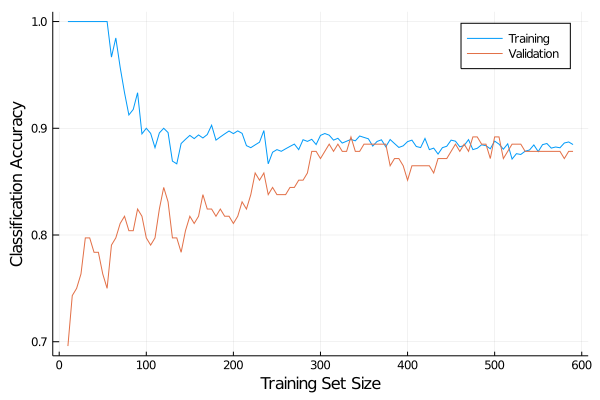

In [35]:
plot(data_schedule, training_losses, label="Training")
plot!(data_schedule, valid_losses, label="Validation")
ylabel!("Classification Accuracy")
xlabel!("Training Set Size")

In [36]:
data_schedule, training_losses, valid_losses = learn_curve(best_rbf_model, X_stand[train,:], y[train])

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (10, 1.0, 0.6891891891891893)
(d, train_metric, valid_metric) = (15, 1.0, 0.75)
(d, train_metric, valid_metric) = (20, 0.95, 0.75)
(d, train_metric, valid_metric) = (25, 1.0, 0.7635135135135135)
(d, train_metric, valid_metric) = (30, 1.0, 0.7905405405405406)
(d, train_metric, valid_metric) = (35, 1.0, 0.7905405405405406)
(d, train_metric, valid_metric) = (40, 1.0, 0.7837837837837838)
(d, train_metric, valid_metric) = (45, 1.0, 0.7837837837837838)
(d, train_metric, valid_metric) = (50, 1.0, 0.7702702702702703)
(d, train_metric, valid_metric) = (55, 1.0, 0.7635135135135135)
(d, train_metric, valid_metric) = (60, 0.9666666666666667, 0.7905405405405406)
(d, train_metric, valid_metric) = (65, 0.9846153846153847, 0.7905405405405406)
(d, train_metric, valid_metric) = (70, 0.9714285714285714, 0.7972972972972973)
(d, train_metric, valid_metric) = (75, 0.9333333333333333, 0.8175675675675675)
(d, train_metric, valid_metric) = (80, 0.9125, 0.8108108108108107)
(d, 

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (150, 0.9, 0.8108108108108107)
(d, train_metric, valid_metric) = (155, 0.896774193548387, 0.8108108108108107)
(d, train_metric, valid_metric) = (160, 0.9, 0.8175675675675675)
(d, train_metric, valid_metric) = (165, 0.896969696969697, 0.8175675675675675)
(d, train_metric, valid_metric) = (170, 0.8941176470588236, 0.8243243243243243)
(d, train_metric, valid_metric) = (175, 0.8971428571428571, 0.8310810810810811)
(d, train_metric, valid_metric) = (180, 0.8833333333333333, 0.8243243243243243)
(d, train_metric, valid_metric) = (185, 0.8810810810810811, 0.8310810810810811)
(d, train_metric, valid_metric) = (190, 0.8947368421052632, 0.8310810810810811)
(d, train_metric, valid_metric) = (195, 0.8871794871794871, 0.8310810810810811)
(d, train_metric, valid_metric) = (200, 0.885, 0.8243243243243243)
(d, train_metric, valid_metric) = (205, 0.8926829268292683, 0.8175675675675675)
(d, train_metric, valid_metric) = (210, 0.8952380952380953, 0.8243243243243243)
(d, t

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (240, 0.8666666666666667, 0.8513513513513513)
(d, train_metric, valid_metric) = (245, 0.8693877551020408, 0.8513513513513513)
(d, train_metric, valid_metric) = (250, 0.884, 0.8581081081081081)
(d, train_metric, valid_metric) = (255, 0.8784313725490196, 0.8378378378378378)
(d, train_metric, valid_metric) = (260, 0.8807692307692307, 0.8378378378378378)
(d, train_metric, valid_metric) = (265, 0.8867924528301887, 0.8513513513513513)
(d, train_metric, valid_metric) = (270, 0.8925925925925926, 0.8513513513513513)
(d, train_metric, valid_metric) = (275, 0.8945454545454545, 0.8648648648648649)
(d, train_metric, valid_metric) = (280, 0.9, 0.8513513513513513)
(d, train_metric, valid_metric) = (285, 0.887719298245614, 0.8581081081081081)
(d, train_metric, valid_metric) = (290, 0.8931034482758621, 0.8716216216216216)
(d, train_metric, valid_metric) = (295, 0.888135593220339, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (300, 0.8833333333333333, 0.8716216216216216)
(d, train_metric, valid_metric) = (305, 0.8950819672131147, 0.8648648648648649)
(d, train_metric, valid_metric) = (310, 0.8903225806451613, 0.8851351351351351)
(d, train_metric, valid_metric) = (315, 0.8888888888888888, 0.8716216216216216)
(d, train_metric, valid_metric) = (320, 0.896875, 0.8851351351351351)
(d, train_metric, valid_metric) = (325, 0.8953846153846154, 0.8851351351351351)
(d, train_metric, valid_metric) = (330, 0.896969696969697, 0.8851351351351351)
(d, train_metric, valid_metric) = (335, 0.8865671641791044, 0.8918918918918919)
(d, train_metric, valid_metric) = (340, 0.8852941176470588, 0.8918918918918919)
(d, train_metric, valid_metric) = (345, 0.8869565217391304, 0.8918918918918919)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (350, 0.8857142857142857, 0.8918918918918919)
(d, train_metric, valid_metric) = (355, 0.8788732394366197, 0.8783783783783784)
(d, train_metric, valid_metric) = (360, 0.8833333333333333, 0.8851351351351351)
(d, train_metric, valid_metric) = (365, 0.8849315068493151, 0.8648648648648649)
(d, train_metric, valid_metric) = (370, 0.8864864864864865, 0.8648648648648649)
(d, train_metric, valid_metric) = (375, 0.888, 0.8851351351351351)
(d, train_metric, valid_metric) = (380, 0.8921052631578947, 0.8716216216216216)
(d, train_metric, valid_metric) = (385, 0.8883116883116883, 0.8648648648648649)
(d, train_metric, valid_metric) = (390, 0.8974358974358975, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (395, 0.8936708860759494, 0.8851351351351351)
(d, train_metric, valid_metric) = (400, 0.895, 0.8581081081081081)
(d, train_metric, valid_metric) = (405, 0.8962962962962963, 0.8581081081081081)
(d, train_metric, valid_metric) = (410, 0.8951219512195122, 0.8783783783783784)
(d, train_metric, valid_metric) = (415, 0.891566265060241, 0.8648648648648649)
(d, train_metric, valid_metric) = (420, 0.8976190476190476, 0.8581081081081081)
(d, train_metric, valid_metric) = (425, 0.8870588235294118, 0.8648648648648649)
(d, train_metric, valid_metric) = (430, 0.8837209302325582, 0.8581081081081081)
(d, train_metric, valid_metric) = (435, 0.8804597701149426, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (440, 0.8863636363636364, 0.8648648648648649)
(d, train_metric, valid_metric) = (445, 0.8876404494382022, 0.8648648648648649)
(d, train_metric, valid_metric) = (450, 0.8888888888888888, 0.8581081081081081)
(d, train_metric, valid_metric) = (455, 0.8879120879120879, 0.8716216216216216)
(d, train_metric, valid_metric) = (460, 0.8782608695652174, 0.8648648648648649)
(d, train_metric, valid_metric) = (465, 0.886021505376344, 0.8716216216216216)
(d, train_metric, valid_metric) = (470, 0.8829787234042553, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (475, 0.8863157894736842, 0.8783783783783784)
(d, train_metric, valid_metric) = (480, 0.8895833333333334, 0.8783783783783784)
(d, train_metric, valid_metric) = (485, 0.8865979381443299, 0.8783783783783784)
(d, train_metric, valid_metric) = (490, 0.8816326530612245, 0.8716216216216216)
(d, train_metric, valid_metric) = (495, 0.8848484848484849, 0.8716216216216216)
(d, train_metric, valid_metric) = (500, 0.88, 0.8716216216216216)
(d, train_metric, valid_metric) = (505, 0.8831683168316832, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (510, 0.888235294117647, 0.8648648648648649)
(d, train_metric, valid_metric) = (515, 0.883495145631068, 0.8716216216216216)
(d, train_metric, valid_metric) = (520, 0.8711538461538462, 0.8716216216216216)
(d, train_metric, valid_metric) = (525, 0.8742857142857143, 0.8648648648648649)
(d, train_metric, valid_metric) = (530, 0.8754716981132076, 0.8648648648648649)
(d, train_metric, valid_metric) = (535, 0.8785046728971962, 0.8648648648648649)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (540, 0.8796296296296297, 0.8783783783783784)
(d, train_metric, valid_metric) = (545, 0.8807339449541285, 0.8783783783783784)
(d, train_metric, valid_metric) = (550, 0.8818181818181818, 0.8783783783783784)
(d, train_metric, valid_metric) = (555, 0.8828828828828829, 0.8783783783783784)
(d, train_metric, valid_metric) = (560, 0.8767857142857143, 0.8783783783783784)
(d, train_metric, valid_metric) = (565, 0.879646017699115, 0.8783783783783784)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (570, 0.8894736842105263, 0.8851351351351351)
(d, train_metric, valid_metric) = (575, 0.8852173913043478, 0.8783783783783784)
(d, train_metric, valid_metric) = (580, 0.8896551724137931, 0.8783783783783784)
(d, train_metric, valid_metric) = (585, 0.8888888888888888, 0.8716216216216216)


┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @974`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var

(d, train_metric, valid_metric) = (590, 0.8864406779661017, 0.8716216216216216)


(10:5:590, Any[1.0, 1.0, 0.95, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.8807339449541285, 0.8818181818181818, 0.8828828828828829, 0.8767857142857143, 0.879646017699115, 0.8894736842105263, 0.8852173913043478, 0.8896551724137931, 0.8888888888888888, 0.8864406779661017], Any[0.6891891891891893, 0.75, 0.75, 0.7635135135135135, 0.7905405405405406, 0.7905405405405406, 0.7837837837837838, 0.7837837837837838, 0.7702702702702703, 0.7635135135135135  …  0.8783783783783784, 0.8783783783783784, 0.8783783783783784, 0.8783783783783784, 0.8783783783783784, 0.8851351351351351, 0.8783783783783784, 0.8783783783783784, 0.8716216216216216, 0.8716216216216216])

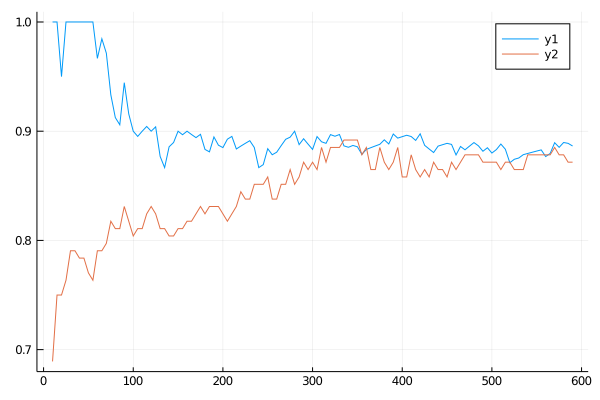

In [37]:
plot(data_schedule, training_losses)
plot!(data_schedule, valid_losses)

# Final Results

Linear SVM

In [38]:
final_svm = SVMClassifier(kernel="linear", C = best_C, cache_size=1000)

SVMClassifier(
    C = 0.24469504592387473,
    kernel = "linear",
    degree = 3,
    gamma = "auto",
    coef0 = 0.0,
    shrinking = true,
    tol = 0.001,
    cache_size = 1000,
    max_iter = -1,
    decision_function_shape = "ovr",
    random_state = nothing) @976

In [56]:
Final_SVM = machine(final_svm, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @976`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{SVMClassifier} @156 trained 0 times.
  args: 
    1:	Source @145 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @980 ⏎ `AbstractArray{Multiclass{2},1}`


In [57]:
fit!(Final_SVM, rows=train, verbosity=2)

┌ Info: Training Machine{SVMClassifier} @156.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{SVMClassifier} @156 trained 1 time.
  args: 
    1:	Source @145 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @980 ⏎ `AbstractArray{Multiclass{2},1}`


In [58]:
ŷ2 = MLJ.predict(Final_SVM, X_stand[test,:]);

In [59]:
accuracy(ŷ2, y[test])

0.8801261829652997

In [60]:
confusion_matrix(ŷ2, y[test])

┌ Warning: The classes are un-ordered,
│ using: negative='NRB' and positive='RB'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/measures/confusion_matrix.jl:83


              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │     NRB     │     RB      │
├─────────────┼─────────────┼─────────────┤
│     NRB     │     198     │     19      │
├─────────────┼─────────────┼─────────────┤
│     RB      │     19      │     81      │
└─────────────┴─────────────┴─────────────┘


RBF SVM

In [61]:
final_svm_rbf = best_rbf.best_model

SVMClassifier(
    C = 1.3912797011035627e6,
    kernel = "rbf",
    degree = 3,
    gamma = 1.0e-7,
    coef0 = 0.0,
    shrinking = true,
    tol = 0.001,
    cache_size = 1000,
    max_iter = -1,
    decision_function_shape = "ovr",
    random_state = nothing) @921

In [62]:
Final_SVM = machine(final_svm, X_stand, y)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=SVMClassifier @976`:
│ scitype(X) = Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}
│ input_scitype(model) = Table{var"#s44"} where var"#s44"<:(AbstractArray{var"#s13",1} where var"#s13"<:Continuous).
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:77


Machine{SVMClassifier} @729 trained 0 times.
  args: 
    1:	Source @064 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @508 ⏎ `AbstractArray{Multiclass{2},1}`


In [63]:
fit!(Final_SVM, rows=train, verbosity=2)

┌ Info: Training Machine{SVMClassifier} @729.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{SVMClassifier} @729 trained 1 time.
  args: 
    1:	Source @064 ⏎ `Table{Union{AbstractArray{Continuous,1}, AbstractArray{Count,1}}}`
    2:	Source @508 ⏎ `AbstractArray{Multiclass{2},1}`


In [64]:
ŷ2 = MLJ.predict(Final_SVM, X_stand[test,:]);

In [65]:
accuracy(ŷ2, y[test])

0.8801261829652997

In [66]:
confusion_matrix(ŷ2, y[test])

┌ Warning: The classes are un-ordered,
│ using: negative='NRB' and positive='RB'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/measures/confusion_matrix.jl:83


              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │     NRB     │     RB      │
├─────────────┼─────────────┼─────────────┤
│     NRB     │     198     │     19      │
├─────────────┼─────────────┼─────────────┤
│     RB      │     19      │     81      │
└─────────────┴─────────────┴─────────────┘
